In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import decimal as d
from sklearn import preprocessing

In [422]:
from math import factorial
def bates(array, n):
    sng = 0
    result = 0
    X = np.average(array)
    f = (n/factorial(n-1))
    for k in range(n+1):
        if n*X < k:
            sng = -1
        if n*X == k:
            sng = 0
        if n*X > k:
            sng = 1
        result += ((-1)**k * nCr(n, k) * (n*X - k)**(n-1) * sng *f)
    return [X,result]
    

<h1>Minimum at Rp distance away</h1>

In [423]:
first1 = pd.read_csv("/Users/physica/Documents/GitHub/WGM_Forces/TheOnesThatReachedFirst2.csv")
reach1= pd.read_csv("/Users/physica/Documents/GitHub/WGM_Forces/TheOnesThatReachedFromTheTotal2.csv")
allGen1 = pd.read_csv("/Users/physica/Documents/GitHub/WGM_Forces/TotalRandomGeneratedData2.csv")

Final Theta angle of those that reached first

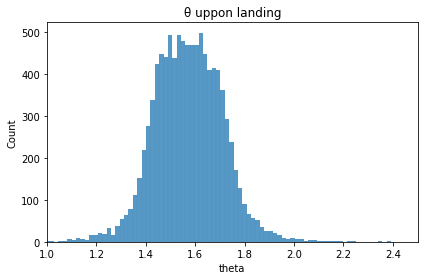

In [424]:
fig, ax = plt.subplots()
sns.histplot(data=first1, x = 'theta', ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(1,2.5)
ax.set_title("\u03B8 uppon landing")
#ax.set_xticks(range(7.5*10**(-7) - 3.75*10**(-8), 7.5*10**(-7) + 3.75*10**(-8)))
plt.show()

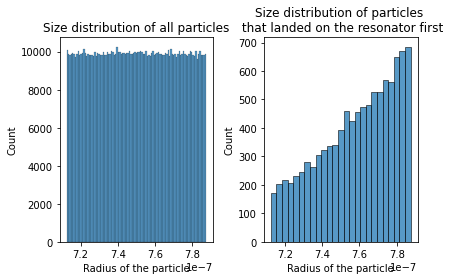

In [425]:

plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Radius of the particle")
axes[1].set_xlabel("Radius of the particle")
axes[0].set_title("Size distribution of all particles")
axes[1].set_title("Size distribution of particles \n that landed on the resonator first")
sns.histplot(data = first1, x = 'Rp_', ax=axes[1])
sns.histplot(data = allGen1, x = 'Rp_', ax=axes[0])
plt.show()

<h1>min distance at 4Xmax(Rp)</h1>

In [426]:
first2 = pd.read_csv("/Users/physica/Documents/GitHub/WGM_Forces/TheOnesThatReachedFirst3.csv")
reach2 = pd.read_csv("/Users/physica/Documents/GitHub/WGM_Forces/TheOnesThatReachedFromTheTotal3.csv")
allGen2 = pd.read_csv("/Users/physica/Documents/GitHub/WGM_Forces/TotalRandomGeneratedData3.csv")

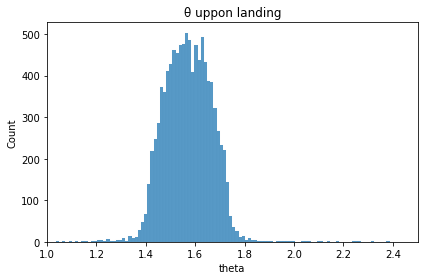

In [427]:
fig, ax = plt.subplots()
sns.histplot(data=first2, x = 'theta', ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(1,2.5)
ax.set_title("\u03B8 uppon landing")
#ax.set_xticks(range(7.5*10**(-7) - 3.75*10**(-8), 7.5*10**(-7) + 3.75*10**(-8)))
plt.show()

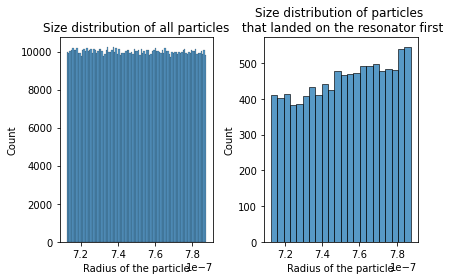

In [428]:

plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Radius of the particle")
axes[1].set_xlabel("Radius of the particle")
axes[0].set_title("Size distribution of all particles")
axes[1].set_title("Size distribution of particles \n that landed on the resonator first")
sns.histplot(data = first2, x = 'Rp_', ax=axes[1])
sns.histplot(data = allGen2, x = 'Rp_', ax=axes[0])
plt.show()

<span>Statistics</span>

In [429]:
def norm(array):
    for i in range(len(array)):
        array[i] = (array[i]-min(array)) / (max(array)-min(array))
    return array

In [430]:
#allgen =np.asarray(allGen1.Rp_.to_numpy()).reshape(1,1000000)

In [431]:
def AVG(array,type):
    a = []
    low = 0
    high = 100
    for i in range(int(len(array)/100)):
        arr = array[low:high]
        if type == "avg":
            avg = np.average(arr)
            a.append(avg)
        if type == "std":
            std = np.std(arr)
            a.append(std)
        low+=100
        high+=100
    return a
        

In [432]:
def norm(N,d):
    d = np.sort(d)
    sc = (max(d)-min(d))/N
    count = 0
    f = []
    g = []
    low = min(d)
    f.append(low)
    high = low+sc
    for j in range(N):
        for i in d:
            if i>=low and i<=high:
                count+=1
        f.append(high)
        g.append(count/len(d))
        count = 0
        low+=sc
        high+=sc
    return [f,g]

In [433]:
def mean1(matrix):
    sm = 0
    hor = matrix[0]
    count = matrix[1]
    for i in range(len(hor)-1):
        sm += count[i]*((hor[i+1]+hor[i])/2)
    return sm


In [434]:
g = first1["Rp_"].to_numpy()
gg = norm(200,g)

g1 = first2["Rp_"].to_numpy()
gg1 = norm(200,g1)

In [455]:
def stdev(array):
    count = array[1]
    hor = array[0]
    sm = 0
    mean = mean1(array)
    for i in range(len(hor)-1):
        sm += (((((hor[i]+hor[i+1])/2) - mean)**2) * count[i])
    return np.sqrt(sm)


In [456]:
b = AVG(allGen1["Rp_"].to_numpy(),"avg")

b2 = AVG(allGen2["Rp_"].to_numpy(),"avg")

b11 = AVG(allGen1["Rp_"].to_numpy(),"std")
b22 = AVG(allGen2["Rp_"].to_numpy(),"std")


In [437]:
print(max(allGen1["Rp_"].to_numpy()))
print(max(b))

7.874999543736344e-07
7.575650212991493e-07


In [457]:
a = norm(200,b)
a2 =norm(200,b2)

aa = norm(200,b11)
aa2 = norm(200,b22)

In [439]:
vl = mean1(a)+(2*stdev(a))
vl2 = mean1(a2) + (2*stdev(a2))

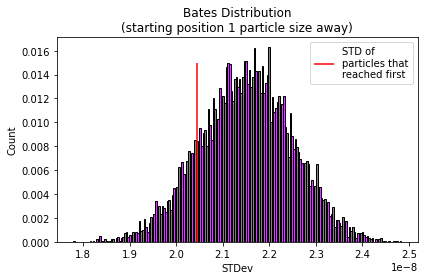

In [458]:
Average1=stdev(gg)
fig, ax = plt.subplots()
bin_edge=aa[0]
counts = aa[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 1 particle size away)")
ax.set_xlabel("STDev")
ax.set_ylabel("Count")
#ax.vlines([vl],0, 0.015,colors="blue")
ax.vlines([Average1], 0,.015,colors="red",label="STD of\nparticles that\nreached first")
ax.legend()

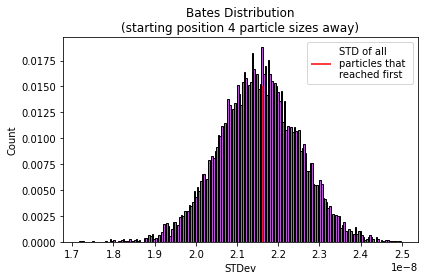

In [459]:
Average1=stdev(gg1)
fig, ax = plt.subplots()
bin_edge=aa2[0]
counts = aa2[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 4 particle sizes away)")
ax.set_xlabel("STDev")
ax.set_ylabel("Count")
#ax.vlines([vl],0, 0.015,colors="blue")
ax.vlines([Average1], 0,.015,colors="red",label="STD of all \nparticles that \nreached first")
ax.legend()

In [442]:
def nCr(n, r):
     
    return (factorial(n) / (factorial(r)
                * factorial(n - r)))


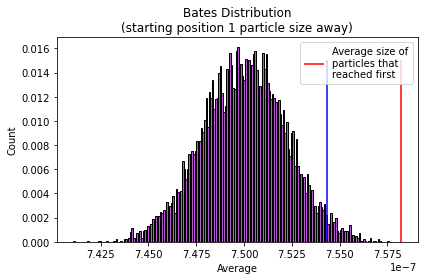

In [443]:
Average1=mean1(gg)
fig, ax = plt.subplots()
bin_edge=a[0]
counts = a[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 1 particle size away)")
ax.set_xlabel("Average")
ax.set_ylabel("Count")
ax.vlines([vl],0, 0.015,colors="blue")
ax.vlines([Average1], 0,.015,colors="red",label="Average size of\nparticles that\nreached first")
ax.legend()

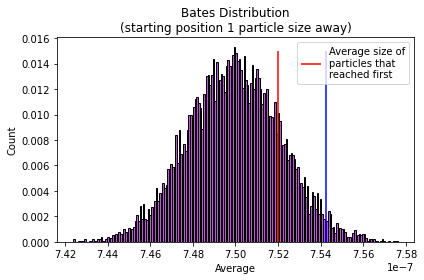

In [454]:
Average1=mean1(gg1)
fig, ax = plt.subplots()
bin_edge=a2[0]
counts = a2[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 1 particle size away)")
ax.set_xlabel("Average")
ax.set_ylabel("Count")
ax.vlines([vl2],0, 0.015,colors="blue")
ax.vlines([Average1], 0,.015,colors="red",label="Average size of\nparticles that\nreached first")
ax.legend()

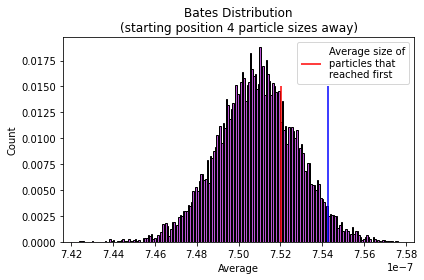

In [447]:
Average2=mean1(gg1)
fig, ax = plt.subplots()
bin_edge2=a2[0]
counts2 = a2[1]
ax.bar(x=bin_edge2[:-1], height=counts, width=np.diff(bin_edge2), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 4 particle sizes away)")
ax.set_xlabel("Average")
ax.set_ylabel("Count")
ax.vlines([vl2],0,.015,colors="blue")
ax.vlines([Average2], 0,.015,colors="red",label="Average size of\nparticles that\nreached first")
ax.legend()

In [ ]:
print("One Particle Size Away")
print("area under the curve: ", sum(a[1]))
s = 0
for i in range(len(a[0])-1):
    if a[0][i] > Average1:
        s += a[0][i]
print("p-value: ", s)

One Particle Size Away
area under the curve:  0.9999999999999998
p-value:  1.96677153620796e-05


In [ ]:
print("Four Particle Sizes Away")
print("area under the curve: ", sum(a2[1]))
s2 = 0
for i in range(len(a2[0])-1):
    if a2[0][i] > Average1:
        s2 += a2[0][i]
print("p-value: ", s2)

Four Particle Sizes Away
area under the curve:  0.9999999999999996
p-value:  2.1937763108126325e-05
